# setting  optimizer and learning rate

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import os
from six.moves import cPickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam,Adadelta,Adagrad,RMSprop
from tensorflow.keras.utils import to_categorical
%matplotlib inline

Definding function:

In [115]:
# this function give file of data  as numpy array or image

def getImageData(filename):
    f = open(filename,'rb')
    datadict = cPickle.load(f,encoding='latin1') #Why the hell latin1 ???
    f.close()
    X=datadict['data'].reshape((len(datadict['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    return X


# this function give file of data  as dictionary


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

shape of input image: (10000, 32, 32, 3)
#############################################
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape of target vector: (10000, 10)


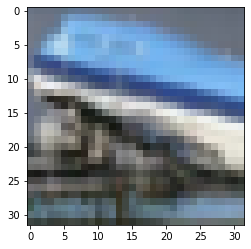

In [167]:
file='cifar-10-batches-py\data_batch_3'

X_image = getImageData(file)
x=unpickle(file)


print('shape of input image:',X_image.shape)
print('#############################################')
plt.imshow(X_image[35])


#geting vector  of target of data:
y=x[b'labels']
y_train=to_categorical(y)
print(y_train[35])
print('shape of target vector:',y_train.shape)

In [168]:
x_flatten=X_image.reshape(10000,-1)

x_train=x_flatten/255

# Constructing model:

در این قسمت با تغییر اپتیمایزر ها و آلفا به بهترین انتخاب می رسیم

In [169]:
model=Sequential()


model.add(Dense(500,activation='relu',input_dim=3072))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 500)               1536500   
_________________________________________________________________
dense_41 (Dense)             (None, 10)                5010      
Total params: 1,541,510
Trainable params: 1,541,510
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.compile(optimizer=Adam(learning_rate=0.1),loss='categorical_crossentropy',metrics=['accuracy'])

In [171]:
history=model.fit(x_train,y_train,validation_split=0.1,batch_size=128,epochs=70)

Epoch 1/70
71/71 [==============================] - 1s 8ms/step - loss: 138.1770 - accuracy: 0.1021 - val_loss: 2.3319 - val_accuracy: 0.1050
Epoch 2/70
71/71 [==============================] - 0s 7ms/step - loss: 2.6292 - accuracy: 0.0974 - val_loss: 2.3045 - val_accuracy: 0.1030
Epoch 3/70
71/71 [==============================] - 0s 6ms/step - loss: 2.3041 - accuracy: 0.1000 - val_loss: 2.3031 - val_accuracy: 0.0990
Epoch 4/70
71/71 [==============================] - 0s 6ms/step - loss: 2.3044 - accuracy: 0.1024 - val_loss: 2.3050 - val_accuracy: 0.1040
Epoch 5/70
71/71 [==============================] - 0s 6ms/step - loss: 2.3048 - accuracy: 0.0969 - val_loss: 2.3064 - val_accuracy: 0.0950
Epoch 6/70
71/71 [==============================] - 0s 6ms/step - loss: 2.3046 - accuracy: 0.1031 - val_loss: 2.3051 - val_accuracy: 0.0980
Epoch 7/70
71/71 [==============================] - 0s 6ms/step - loss: 2.3069 - accuracy: 0.1003 - val_loss: 2.3053 - val_accuracy: 0.0990
Epoch 8/70
71/71 [

71/71 [==============================] - 0s 7ms/step - loss: 2.3074 - accuracy: 0.1032 - val_loss: 2.3104 - val_accuracy: 0.0990
Epoch 60/70
71/71 [==============================] - 0s 7ms/step - loss: 2.3082 - accuracy: 0.0986 - val_loss: 2.3069 - val_accuracy: 0.0870
Epoch 61/70
71/71 [==============================] - 0s 6ms/step - loss: 2.3074 - accuracy: 0.0950 - val_loss: 2.3114 - val_accuracy: 0.1040
Epoch 62/70
71/71 [==============================] - 0s 7ms/step - loss: 2.3097 - accuracy: 0.0921 - val_loss: 2.3056 - val_accuracy: 0.0990
Epoch 63/70
71/71 [==============================] - 0s 7ms/step - loss: 2.3070 - accuracy: 0.0987 - val_loss: 2.3083 - val_accuracy: 0.1030
Epoch 64/70
71/71 [==============================] - 1s 7ms/step - loss: 2.3088 - accuracy: 0.0958 - val_loss: 2.3038 - val_accuracy: 0.0870
Epoch 65/70
71/71 [==============================] - 0s 7ms/step - loss: 2.3086 - accuracy: 0.0991 - val_loss: 2.3096 - val_accuracy: 0.0870
Epoch 66/70
71/71 [======

Plotting learn curves:

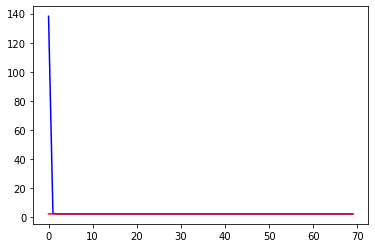

In [172]:
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'r-')
plt.show()

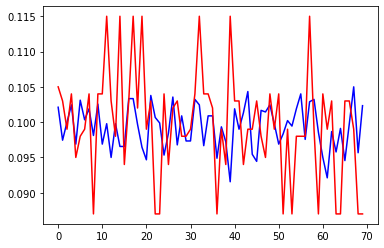

In [173]:
plt.plot(history.history['accuracy'],'b-')
plt.plot(history.history['val_accuracy'],'r-')
plt.show()

In [174]:
print('max acc of validation:',max(history.history['val_accuracy']))

max acc of validation: 0.11500000208616257


In [175]:
print('max acc of trian:',max(history.history['accuracy']))

max acc of trian: 0.10499999672174454
